In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
from sodapy import Socrata

In [3]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

### Make an API request that returns the months where "fire" was searched in 2016.

In [5]:
endpoint="https://data.nashville.gov/resource/fuaa-r5cm.json?query_text='fire'&year=2016"
response = requests.get(endpoint)
response

<Response [200]>

In [6]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

### Which month had the most searches?

In [7]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$select=max(month_name)&$where=query_text='fire'&year=2016"

In [8]:
response = requests.get(endpoint)
response

<Response [200]>

In [9]:
response.text

'[{"max_month_name":"September"}]\n'

### Make an API request that returns all the times a query was run more than 100 times in a month.

In [10]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count >100"
response = requests.get(endpoint)
response

<Response [200]>

In [11]:
res = response.json()
res

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

### How many times did this occur?

In [12]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)&$where=query_count >100"
response = requests.get(endpoint)
response

<Response [200]>

In [13]:
response.text

'[{"count":"1262"}]\n'

### Make another API request that returns all the times "codes" was searched more than 100 times in a month.

In [14]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?query_text='codes'&$where=query_count >100"
response = requests.get(endpoint)
response

<Response [200]>

In [15]:
res = response.json()
res

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

### How many times did this occur?

In [16]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)&$where=query_count >100&query_text='codes'"
response = requests.get(endpoint)
response

<Response [200]>

In [17]:
response.text

'[{"count":"56"}]\n'

### Make an API request that returns the entire Top 500 Monthly Searches dataset.

In [18]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?"
response = requests.get(endpoint)
response

<Response [200]>

In [19]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [20]:
client = Socrata("data.nashville.gov", None)

In [21]:
results = client.get("fuaa-r5cm")

In [22]:
results_df = pd.DataFrame.from_records(results)

In [23]:
results_df

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs
...,...,...,...,...
995,February,2014,7,pay stubs
996,February,2014,7,school lunch menu
997,February,2014,7,contractors permit bond
998,February,2014,7,media


In [24]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)"
record_count = requests.get(endpoint)
record_count

<Response [200]>

In [25]:
rec_count =record_count.json()
rec_count

[{'count': '43677'}]

In [26]:
url = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(url)
response

<Response [200]>

In [27]:
path='C:/Users/iulia/Documents/NSS/projects/socrata-api-igoike/data/token.json'

In [28]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [29]:
keys = get_keys(path)
token = keys['api_token']

In [30]:
data_url='data.nashville.gov'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='fuaa-r5cm'    # The data set at the API endpoint
app_token= token   
client = Socrata(data_url,app_token)    
# Set the timeout to 60 seconds    
client.timeout = 60
# Retrieve the first2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=2000)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)

In [31]:
df

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs
...,...,...,...,...
1995,April,2014,7,metro action commission
1996,April,2014,7,sponsorship rules
1997,April,2014,7,seasonal
1998,April,2014,7,Cumberland park


### Make an API request that returns the entire Top 500 Monthly Searches dataset.

In [32]:
record_count = client.get(data_set, select="COUNT(*)")
record_count

[{'COUNT': '43677'}]

In [33]:
start = 0             # Start at 0
chunk_size = 2000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend(client.get(data_set,offset=start, limit=chunk_size))
     # Move up the starting record
     start = start + chunk_size
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list into a data frame
df = pd.DataFrame.from_records(results)

In [34]:
df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


### Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   43677 non-null  object
 1   year         43677 non-null  object
 2   query_count  43676 non-null  object
 3   query_text   43677 non-null  object
 4   month        15177 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [36]:
df.isnull().sum()

month_name         0
year               0
query_count        1
query_text         0
month          28500
dtype: int64

In [37]:
df = df.dropna(subset=['query_count'])

In [38]:
df = df.astype({'query_count':'int'})

In [39]:
rslt_df = df[df['query_text'] == 'maps']

In [40]:
rslt_df

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


In [41]:
rslt_df_new  = rslt_df[rslt_df['month_name'] == 'January']
rslt_df_new

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
6266,January,2015,119,maps,NaN
8001,January,2017,117,maps,NaN
12034,January,2016,104,maps,NaN
23686,January,2018,173,maps,NaN
28612,January,2019,160,maps,1
34508,January,2020,154,maps,1


In [42]:
df_new = rslt_df.groupby(['month_name'])['query_count'].sum().reset_index()

In [43]:
df_new 

,month_name,query_count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


In [44]:
import seaborn as sns
import numpy as np

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


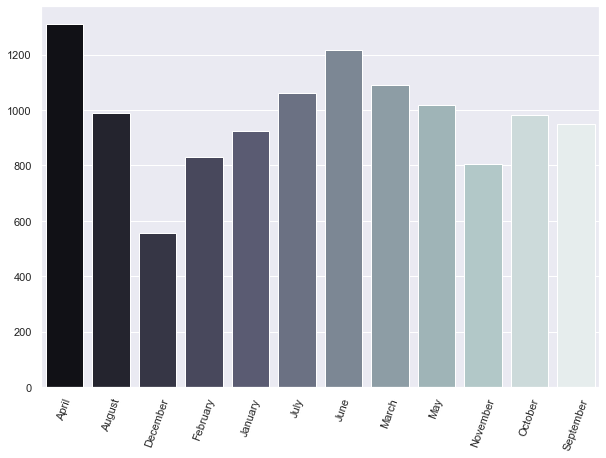

In [45]:
sns.set(rc={"figure.figsize":(10,7)})
g = sns.barplot('month_name','query_count', data = df_new,palette="bone")
g.set_xlabel(None)
g.set_ylabel(None)
plt.xticks(rotation=70);

### Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [46]:
endpoint="https://data.nashville.gov/resource/fuaa-r5cm.json?"
response = requests.get(endpoint)
response

<Response [200]>

In [47]:
len(response.text)

88545

In [48]:
endpoint="https://data.nashville.gov/resource/7qhx-rexh.json?"
response = requests.get(endpoint)
response

<Response [200]>

In [49]:
len(response.text)

854202

### Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

In [50]:
#Beer Permit Locations
endpoint_1="https://data.nashville.gov/resource/3wb6-xy3j.json?$select=count(*)"
response_1 = requests.get(endpoint_1)
response_1

<Response [200]>

In [51]:
response_1.text

'[{"count":"2035"}]\n'

In [52]:
#Traffic Accidents
endpoint_2="https://data.nashville.gov/resource/6v6w-hpcw.json?$select=count(*)"
response_2 = requests.get(endpoint_2)
response_2

<Response [200]>

In [53]:
response_2.text

'[{"count":"216349"}]\n'

In [54]:
endpoint_1="https://data.nashville.gov/resource/3wb6-xy3j.json?$limit=2500"
response_1 = requests.get(endpoint_1)
response_1

<Response [200]>

In [55]:
res_1= response_1.json()
res_1

[{'permit_number': '19-25846',
  'status': 'ISSUED',
  'permit_type': 'BBPERMIT',
  'permit_subtype': 'ONSALES',
  'sub_type_description': 'BB - On Site Sales',
  'date_entered': '2019-01-24T00:00:00.000',
  'date_issued': '2019-06-03T00:00:00.000',
  'parcel': '16300030200',
  'business_name': 'EXO-TIKKA INDIAN CUSINE',
  'address': '5385  MT VIEW RD',
  'city': 'ANTIOCH',
  'state': 'TN',
  'zip': '37013',
  'council_district': '32',
  'census_tract': '37015629',
  'mapped_location': {'latitude': '36.047649',
   'longitude': '-86.648119',
   'human_address': '{"address": "5385 MT VIEW RD", "city": "ANTIOCH", "state": "TN", "zip": "37013"}'},
  ':@computed_region_c9xn_skx3': '30',
  ':@computed_region_sjpq_96s8': '24062',
  ':@computed_region_v3ji_vzam': '2005',
  ':@computed_region_gisn_y5cm': '7',
  ':@computed_region_f73m_vb2k': '8'},
 {'permit_number': '16-20340',
  'status': 'ISSUED',
  'permit_type': 'BBPERMIT',
  'permit_subtype': 'ONSALES',
  'sub_type_description': 'BB - On S

In [56]:
df_1 = pd.DataFrame(res_1)
df_1.head()

,permit_number,status,permit_type,permit_subtype,sub_type_description,date_entered,date_issued,parcel,business_name,address,...,council_district,census_tract,mapped_location,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,:@computed_region_gisn_y5cm,:@computed_region_f73m_vb2k,business_owner,:@computed_region_cfa7_hbpz
0,19-25846,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2019-01-24T00:00:00.000,2019-06-03T00:00:00.000,16300030200,EXO-TIKKA INDIAN CUSINE,5385 MT VIEW RD,...,32,37015629,"{'latitude': '36.047649', 'longitude': '-86.64...",30,24062,2005,7,8,NaN,NaN
1,16-20340,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2016-05-18T00:00:00.000,2016-09-23T00:00:00.000,09114025000,Las Palmas Mexican Restaurant,5821 Charlotte PIKE,...,20,37018101,"{'latitude': '36.149076', 'longitude': '-86.86...",14,15798,2005,8,5,"Las Palmas Mexican Restaurant Inc, Qurino Onate",NaN
2,T21-27275,TEMPORARY,BBPERMIT,ONSALES,BB - On Site Sales,2021-06-04T00:00:00.000,NaN,10200009300,LONGHORN STEAKHOUSE #5639,6804 CHARLOTTE PIKE,...,20,37018201,"{'latitude': '36.134695', 'longitude': '-86.88...",14,15798,2005,8,5,"GMRI, Inc. 100%",NaN
3,17-00205,ISSUED,BBPERMIT,WHOLESALES,"BB - Wholesale, Distributor",2016-11-03T00:00:00.000,2017-07-10T00:00:00.000,09112001600,Fat Bottom Brewing,800 44th AVE N,...,20,37013300,"{'latitude': '36.157013', 'longitude': '-86.83...",14,15798,2005,8,1,Fat Bottom Brewing Inc,642
4,19-25920,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,2019-03-06T00:00:00.000,2019-06-13T00:00:00.000,11714013900,NASHVILLE CIGAR,4001 HILLSBORO PIKE,...,25,37017901,"{'latitude': '36.104329', 'longitude': '-86.81...",23,15809,2005,5,6,686 Bluberry Hill Road,NaN


In [57]:
df_new_1 = df_1[df_1['sub_type_description']=='BB - On Site Sales']
df_new_1

,permit_number,status,permit_type,permit_subtype,sub_type_description,date_entered,date_issued,parcel,business_name,address,...,council_district,census_tract,mapped_location,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,:@computed_region_gisn_y5cm,:@computed_region_f73m_vb2k,business_owner,:@computed_region_cfa7_hbpz
0,19-25846,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2019-01-24T00:00:00.000,2019-06-03T00:00:00.000,16300030200,EXO-TIKKA INDIAN CUSINE,5385 MT VIEW RD,...,32,37015629,"{'latitude': '36.047649', 'longitude': '-86.64...",30,24062,2005,7,8,NaN,NaN
1,16-20340,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2016-05-18T00:00:00.000,2016-09-23T00:00:00.000,09114025000,Las Palmas Mexican Restaurant,5821 Charlotte PIKE,...,20,37018101,"{'latitude': '36.149076', 'longitude': '-86.86...",14,15798,2005,8,5,"Las Palmas Mexican Restaurant Inc, Qurino Onate",NaN
2,T21-27275,TEMPORARY,BBPERMIT,ONSALES,BB - On Site Sales,2021-06-04T00:00:00.000,NaN,10200009300,LONGHORN STEAKHOUSE #5639,6804 CHARLOTTE PIKE,...,20,37018201,"{'latitude': '36.134695', 'longitude': '-86.88...",14,15798,2005,8,5,"GMRI, Inc. 100%",NaN
6,17-25076,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2017-06-07T00:00:00.000,2018-03-02T00:00:00.000,09111005800,BARE BONES BUTCHER,906 51ST AVE N,...,20,37013300,"{'latitude': '36.158192', 'longitude': '-86.84...",14,15798,2005,8,1,NaN,642
7,20-26815,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2020-06-10T00:00:00.000,2020-08-27T00:00:00.000,10501008900,MCDOUGAL'S CHICKEN FINGERS & WINGS,901 12TH AVE S,...,17,37016300,"{'latitude': '36.147073', 'longitude': '-86.78...",11,30406,2005,5,7,NaN,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,21-27409,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-09-09T00:00:00.000,2021-12-16T00:00:00.000,09514011600,ELM HILL TAVERN,1941 ELM HILL PIKE,...,15,37019600,"{'latitude': '36.150161', 'longitude': '-86.70...",20,15800,2005,3,4,Christ Vergitz,NaN
2023,21-27246,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-05-17T00:00:00.000,2022-01-13T00:00:00.000,08212034300,UP-DOWN NASHVILLE,927 WOODLAND ST,...,6,37019200,"{'latitude': '36.175753', 'longitude': '-86.75...",7,15548,2005,2,7,NaN,NaN
2031,21-27494,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-12-13T00:00:00.000,2022-03-14T00:00:00.000,09216019000,DONATOS PIZZA,1915 BROADWAY,...,19,37019500,"{'latitude': '36.14999', 'longitude': '-86.797...",13,30406,2005,5,6,NaN,NaN
2032,21-27425,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-09-24T00:00:00.000,2022-03-16T00:00:00.000,09215010600,COCO'S ITALIAN CAFE,210 LOUISE AVE,...,21,37016500,"{'latitude': '36.15176', 'longitude': '-86.805...",15,30406,2005,5,7,NaN,NaN


In [58]:
#number of businesses with "On Site Sales"
df_new_1 = df_1.groupby(['zip'])['business_name'].count().reset_index()
df_new_1.columns = ['zip_code','number_of_busnisses']
df_new_1.head()

,zip_code,number_of_busnisses
0,0,1
1,37013,87
2,37027,28
3,37067,1
4,37072,11


In [59]:
zip_most_businesses = df_new_1.nlargest(5,'number_of_busnisses')
zip_most_businesses

,zip_code,number_of_busnisses
15,37203,299
26,37214,207
23,37211,169
21,37209,158
18,37206,127


In [60]:
top5_zip = zip_most_businesses['zip_code'].tolist()
top5_zip

['37203', '37214', '37211', '37209', '37206']

In [61]:
endpoint_2="https://data.nashville.gov/resource/6v6w-hpcw.json?$limit=220000"
response_2 = requests.get(endpoint_2)
response_2

<Response [200]>

In [62]:
res_2= response_2.json()
res_2

[{'accident_number': '20220233975',
  'date_and_time': '2022-05-11T18:45:00.000',
  'number_of_motor_vehicles': '0',
  'number_of_injuries': '0',
  'number_of_fatalities': '0',
  'hit_and_run': True,
  'reporting_officer': '140787',
  'collision_type': '4',
  'collision_type_description': 'ANGLE',
  'weather': '21',
  'weather_description': 'CLEAR',
  'illuaccidemination': '1',
  'illumination_description': 'DAYLIGHT',
  'harmfulcodes': '12',
  'harmfuldescriptions': 'MOTOR VEHICLE IN TRANSPORT',
  'street_address': 'APOLLO DR & UNA ANTIOCH PKE',
  'city': 'ANTIOCH',
  'state': 'TN',
  'zip': '37013',
  'rpa': '8897',
  'precinct': 'SOUTH',
  'lat': '36.0716',
  'long': '-86.6643',
  'mapped_location': {'type': 'Point', 'coordinates': [-86.6643, 36.0716]},
  ':@computed_region_wvby_4s8j': '1',
  ':@computed_region_3aw5_2wv7': '1',
  ':@computed_region_p6sk_2acq': '22',
  ':@computed_region_gxvr_9jxz': '15'},
 {'accident_number': '20220233928',
  'date_and_time': '2022-05-12T17:56:00.00

In [63]:
df_2 = pd.DataFrame(res_2)
df_2.head()

,accident_number,date_and_time,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,reporting_officer,collision_type,collision_type_description,weather,...,rpa,precinct,lat,long,mapped_location,:@computed_region_wvby_4s8j,:@computed_region_3aw5_2wv7,:@computed_region_p6sk_2acq,:@computed_region_gxvr_9jxz,property_damage
0,20220233975,2022-05-11T18:45:00.000,0,0,0,True,140787,4,ANGLE,21,...,8897,SOUTH,36.0716,-86.6643,"{'type': 'Point', 'coordinates': [-86.6643, 36...",1,1,22,15,NaN
1,20220233928,2022-05-12T17:56:00.000,0,0,0,False,179575,5,SIDESWIPE - SAME DIRECTION,21,...,9507,HERMIT,36.1955,-86.619,"{'type': 'Point', 'coordinates': [-86.619, 36....",1,2,27,44,NaN
2,20220233798,2022-05-12T17:37:00.000,0,2,0,False,352188,4,ANGLE,21,...,2037,MADISO,36.2618,-86.7576,"{'type': 'Point', 'coordinates': [-86.7576, 36...",1,2,16,16,NaN
3,20220233792,2022-05-12T17:34:00.000,0,0,0,False,725756,5,SIDESWIPE - SAME DIRECTION,21,...,46027,WEST,36.1409,-86.8863,"{'type': 'Point', 'coordinates': [-86.8863, 36...",1,1,24,46,NaN
4,20220233767,2022-05-12T17:16:00.000,0,0,0,True,299267,4,ANGLE,21,...,86042,MIDTOW,36.0708,-86.7697,"{'type': 'Point', 'coordinates': [-86.7697, 36...",1,1,12,27,NaN


In [64]:
df_new_2= df_2.groupby(['zip','hit_and_run'])['accident_number'].count().reset_index()
df_new_2.columns = ['zip_code','hit_and_run','number_of_accidents']
df_new_2.head()


,zip_code,hit_and_run,number_of_accidents
0,37013,False,15493
1,37013,True,5444
2,37015,False,35
3,37015,True,6
4,37027,False,3172


In [65]:
df_merged = df_new_1.merge(df_new_2, how ='inner',on='zip_code')
df_merged.head()                   

,zip_code,number_of_busnisses,hit_and_run,number_of_accidents
0,37013,87,False,15493
1,37013,87,True,5444
2,37027,28,False,3172
3,37027,28,True,446
4,37072,11,False,935


In [66]:
top_5 = df_merged[df_merged['zip_code'].isin(top5_zip)].reset_index()
top_5

,index,zip_code,number_of_busnisses,hit_and_run,number_of_accidents
0,20,37203,299,False,13214
1,21,37203,299,True,3297
2,26,37206,127,False,5663
3,27,37206,127,True,1975
4,32,37209,158,False,7955
5,33,37209,158,True,2286
6,36,37211,169,False,16228
7,37,37211,169,True,5562
8,42,37214,207,False,8025
9,43,37214,207,True,2089


C:\Users\iulia\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


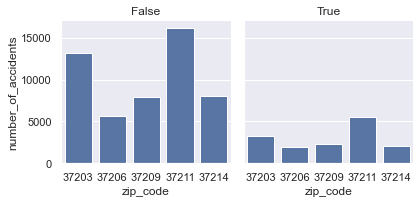

In [67]:
g = sns.FacetGrid(top_5, col='hit_and_run')
g.map(sns.barplot,'zip_code',"number_of_accidents")
g.set_titles(col_template = "{col_name}");